In [1]:
import numpy as np
from numpy import log10
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import iirnotch, lfilter
from sklearn.metrics import mean_squared_error

In [2]:
# Load the EEG signal dataset from a CSV file
eeg_data = pd.read_csv('eeg_data.csv')

In [3]:
signal = eeg_data['EEG.AF3'].values

Text(0.5, 1.0, 'Original Signal')

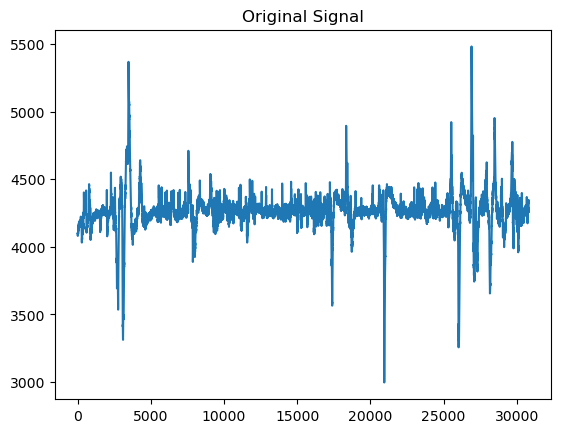

In [4]:
# Plot the noisy signal
plt.figure()
plt.plot(signal)
plt.title('Original Signal')

In [5]:
# Add Poisson noise to the signal
lambda_ = 5  # parameter of the Poisson distribution
noisy_signal = np.random.poisson(lambda_ * np.abs(signal)) * np.sign(signal)

Text(0.5, 1.0, 'Noisy signal')

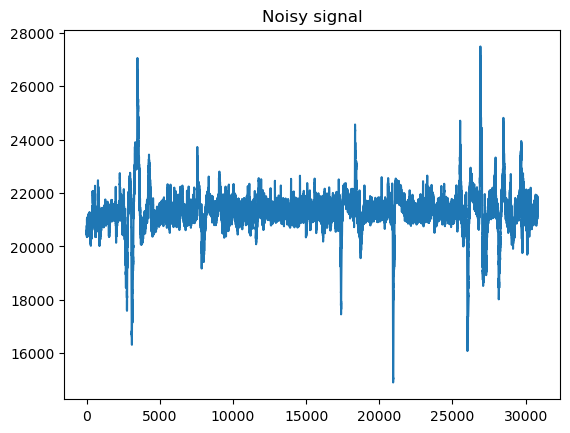

In [6]:
# Plot the noisy signal
plt.figure()
plt.plot(noisy_signal)
plt.title('Noisy signal')

In [7]:
# Define the notch filter parameters
f0 = 50.0  # Frequency to be removed from the signal (in Hz)
Q = 30.0  # Quality factor

# Compute the notch filter coefficients
b, a = iirnotch(f0, Q, fs=1000)

# Apply the notch filter to the noisy signal
filtered_signal = lfilter(b, a, noisy_signal)

In [8]:
mse = mean_squared_error(noisy_signal, filtered_signal)
psnr = 20 * log10(max(noisy_signal)) - 10 * log10(mse)
snr = 10 * log10(np.sum(noisy_signal**2) / np.sum((noisy_signal - filtered_signal)**2))

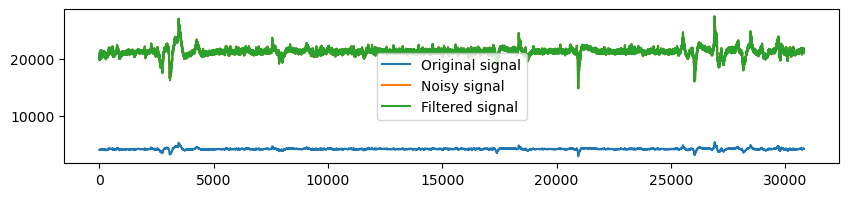

PSNR: 58.6004779659702
MSE: 1043.269395707676
SNR: 56.396871291233936


In [9]:
# Plot the original, noisy, and filtered signals
plt.figure(figsize=(10,2))
plt.plot(signal, label='Original signal')
plt.plot(noisy_signal, label='Noisy signal')
plt.plot(filtered_signal, label='Filtered signal')
plt.legend()
plt.show()

# Print the PSNR, MSE, and SNR values
print("PSNR:", psnr)
print("MSE:", mse)
print("SNR:", snr)

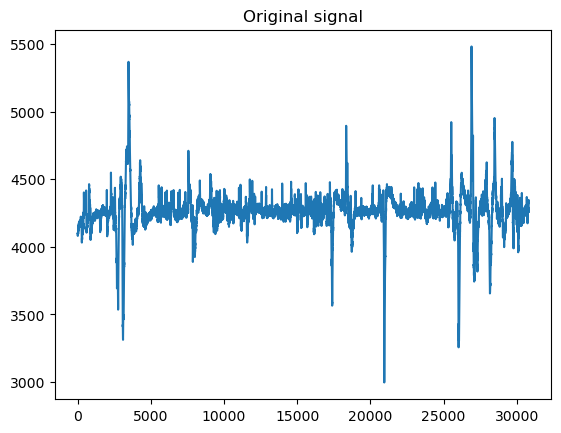

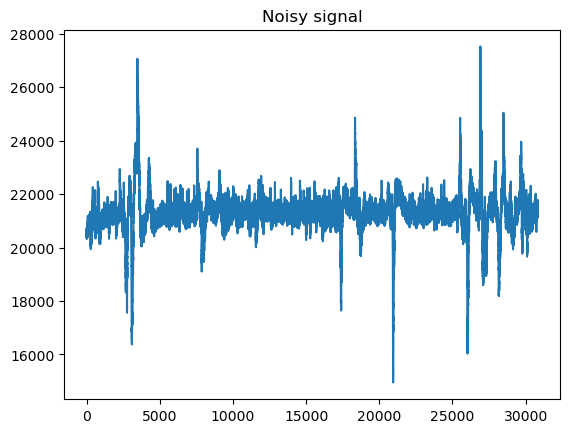

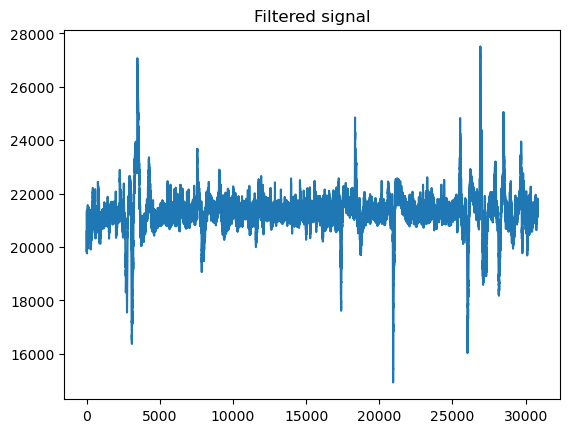

In [31]:
# Plot the original signal
plt.figure()
plt.plot(signal)
plt.title('Original signal')

# Plot the noisy signal
plt.figure()
plt.plot(noisy_signal)
plt.title('Noisy signal')

# Plot the filtered signal
plt.figure()
plt.plot(filtered_signal)
plt.title('Filtered signal')

# Show all the plots
plt.show()